In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

originalMilestone = pd.read_excel('Milestone Sheet 2019 complete v01_edited.xlsx')

In [3]:
originalMilestone

GMAN Airline GMAN Turnaround Type AODB| DEP Flight Number  \
0              BAW                 BOTH                  BA3271   
1              BAW                 BOTH                  BA4451   
2              LGL                 BOTH                  LG4592   
3              KLM                 BOTH                   KL982   
4              DLH                 BOTH                   LH927   
...            ...                  ...                     ...   
27306          SWR                 BOTH                   LX447   
27307          KLM                 BOTH                   KL992   
27308          EIN                 BOTH                   EI291   
27309          KLM                 BOTH                   KL998   
27310          KLM                 BOTH                   KL980   

      GMAN Aircraft Type MASTER_CALENDAR Month GMAN Scheduled In-Block Time  \
0                   E170                   Apr          2019-04-01 06:55:00   
1                   E190                   Apr          2019-04-01 07:00:00   
2                   DH8D                   Apr          2019-04-01 07:05:00   
3                   E190                   Apr          2019-04-01 07:15:00   
4                   E190                   Apr          2019-04-01 07:15:00   
...                  ...                   ...                          ...   
27306               BCS1                   Dec          2019-12-31 17:50:00   
27307               E190                   Dec          2019-12-31 18:25:00   
27308               RJ85                   Dec          2019-12-31 19:30:00   
27309               E190                   Dec          2019-12-31 19:35:00   
27310               E190                   Dec          2019-12-31 20:15:00   

      GMAN Estimated In-Block Time GMAN Actual In-Block Time  \
0              2019-04-01 06:38:00       2019-04-01 06:44:00   
1              2019-04-01 06:46:00       2019-04-01 06:51:00   
2              2019-04-01 06:57:00       2019-04-01 07:01:00   
3              2019-04-01 07:03:00       2019-04-01 07:06:00   
4              2019-04-01 07:06:00       2019-04-01 07:11:00   
...                            ...                       ...   
27306          2019-12-31 17:29:00       2019-12-31 17:35:00   
27307          2019-12-31 18:01:00       2019-12-31 18:06:00   
27308          2019-12-31 19:02:00       2019-12-31 19:08:00   
27309          2019-12-31 19:13:00       2019-12-31 19:18:00   
27310          2019-12-31 20:03:00       2019-12-31 20:08:00   

      GMAN Scheduled Off-Block Time GMAN Estimated Off-Block Time  ...  Year  \
0               2019-04-01 07:30:00           2019-04-01 08:00:00  ...  2019   
1               2019-04-01 07:35:00           2019-04-01 07:35:00  ...  2019   
2               2019-04-01 07:35:00           2019-04-01 07:40:00  ...  2019   
3               2019-04-01 07:45:00           2019-04-01 07:45:00  ...  2019   
4               2019-04-01 07:50:00           2019-04-01 07:50:00  ...  2019   
...                             ...                           ...  ...   ...   
27306           2019-12-31 18:25:00           2019-12-31 18:25:00  ...  2019   
27307           2019-12-31 18:55:00           2019-12-31 18:55:00  ...  2019   
27308           2019-12-31 20:00:00           2019-12-31 20:00:00  ...  2019   
27309           2019-12-31 20:05:00           2019-12-31 20:05:00  ...  2019   
27310           2019-12-31 20:45:00           2019-12-31 20:45:00  ...  2019   

      Unnamed: 96 Unnamed: 97 Unnamed: 98 Unnamed: 99 2019-03-30 23:00:00  \
0             NaN         NaN         NaN         NaN 2019-10-26 22:59:00   
1             NaN         NaN         NaN         NaN                 NaT   
2             NaN         NaN         NaN         NaN                 NaT   
3             NaN         NaN         NaN         NaN                 NaT   
4             NaN         NaN         NaN         NaN                 NaT   
...           ...         ...         ...         ...       

In [8]:
#data preprocessing
origiTimeMilestone = originalMilestone[['First Pax Off','Last Pax Off','First Bag Off','Last Bag Off','Catering Start',
                                   'Catering Stop','Cleaning Start','Cleaning Stop','Fuelling Start','Fuelling Stop',
                                  'First Bag On','Last Bag On','First Pax On','Last Pax On','TOBT Accuracy','AOBT']]


origiTimeMilestone = origiTimeMilestone.dropna(subset=['TOBT Accuracy'])
timeMilestone = origiTimeMilestone.fillna(0)

timeMilestone = timeMilestone.drop(timeMilestone[(timeMilestone['AOBT']<=20.0)|(timeMilestone['AOBT']>60.0)].index)
timeMilestone



First Pax Off  Last Pax Off  First Bag Off  Last Bag Off  \
1               14.0          15.0           11.0          15.0   
2               12.0          13.0           11.0          14.0   
3                7.0          11.0            7.0          15.0   
4                3.0           7.0            6.0          12.0   
5                5.0           8.0            0.0           0.0   
...              ...           ...            ...           ...   
27306            4.0           9.0            0.0           0.0   
27307            6.0           9.0            5.0           9.0   
27308            2.0           9.0            0.0           0.0   
27309            3.0          10.0            0.0           0.0   
27310            4.0           6.0            5.0           9.0   

       Catering Start  Catering Stop  Cleaning Start  Cleaning Stop  \
1                15.0           21.0            15.0           21.0   
2                 0.0            0.0            14.0           16.0   
3                 0.0            0.0             0.0           16.0   
4                 0.0            0.0             0.0            0.0   
5                 8.0           15.0             8.0           14.0   
...               ...            ...             ...            ...   
27306             0.0            0.0            11.0           20.0   
27307             0.0            0.0             0.0           19.0   
27308             0.0            0.0             0.0            0.0   
27309             0.0            0.0             0.0            0.0   
27310             0.0            0.0             0.0           10.0   

       Fuelling Start  Fuelling Stop  First Bag On  Last Bag On  First Pax On  \
1                15.0           21.0          14.0         27.0          24.0   
2                 0.0            0.0          15.0         28.0          19.0   
3                 0.0            0.0           0.0         24.0          22.0   
4                 0.0            0.0          12.0          0.0          19.0   
5                 0.0            0.0           0.0         22.0          19.0   
...               ...            ...           ...          ...           ...   
27306            11.0           18.0          15.0         17.0          20.0   
27307             0.0            0.0          19.0         21.0          28.0   
27308             0.0            0.0           6.0          6.0          15.0   
27309             0.0            9.0          12.0         12.0          12.0   
27310             0.0            0.0          10.0         10.0          10.0   

       Last Pax On  TOBT Accuracy  AOBT  
1             34.0       1.000000  43.0  
2             27.0       6.433333  36.0  
3             38.0      -2.666667  43.0  
4              0.0      -0.616667  41.0  
5             22.0      -3.000000  34.0  
...            ...            ...   ...  
27306         30.0      12.183333  41.0  
27307         29.0      18.000000  34.0  
27308         17.0      31.733333  23.0  
27309         14.0      22.000000  27.0  
27310          9.0      16.000000  24.0  

[22620 rows x 16 columns]

In [9]:
#data preprocessing for statistic subprocess connection numbers
subproConnecStats ={'Deplaning': timeMilestone['Last Pax Off']-timeMilestone['First Pax Off'],
               'Unloading': timeMilestone['Last Bag Off']-timeMilestone['First Bag Off'],
               'Catering': timeMilestone['Catering Stop']-timeMilestone['Catering Start'],
               'Cleaning': timeMilestone['Cleaning Stop']-timeMilestone['Cleaning Start'],
               'Fuelling': timeMilestone['Fuelling Stop']-timeMilestone['Fuelling Start'],
               'Loading': timeMilestone['Last Bag On']-timeMilestone['First Bag On'],
               'Boarding': timeMilestone['Last Pax On']-timeMilestone['First Pax On']}
subproConnec = pd.DataFrame(subproConnecStats)

subproConnec[subproConnec<0] = 0

z = (subproConnec != 0) * 1
z.T.dot(z)

Deplaning  Unloading  Catering  Cleaning  Fuelling  Loading  \
Deplaning      21087       7562      9056     15816     14926    16629   
Unloading       7562       7682      2218      5565      5441     6293   
Catering        9056       2218      9280      8157      8218     7254   
Cleaning       15816       5565      8157     16161     12286    12977   
Fuelling       14926       5441      8218     12286     15310    12245   
Loading        16629       6293      7254     12977     12245    17467   
Boarding       20135       7310      8948     15522     14761    16474   

           Boarding  
Deplaning     20135  
Unloading      7310  
Catering       8948  
Cleaning      15522  
Fuelling      14761  
Loading       16474  
Boarding      20815

In [5]:
#data preprocessing
subProcessDurDic ={'Deplaning': timeMilestone['Last Pax Off']-timeMilestone['First Pax Off'],
               'Unloading': timeMilestone['Last Bag Off']-timeMilestone['First Bag Off'],
               'Catering': timeMilestone['Catering Stop']-timeMilestone['Catering Start'],
               'Cleaning': timeMilestone['Cleaning Stop']-timeMilestone['Cleaning Start'],
               'Fuelling': timeMilestone['Fuelling Stop']-timeMilestone['Fuelling Start'],
               'Loading': timeMilestone['Last Bag On']-timeMilestone['First Bag On'],
               'Boarding': timeMilestone['Last Pax On']-timeMilestone['First Pax On'],
               'AOBT': timeMilestone['AOBT']}
subProcessDur = pd.DataFrame(subProcessDurDic)

subProcessDur[subProcessDur<0] = 0

# subProcessDur = subProcessDur.drop(subProcessDur[(subProcessDur['Deplaning']==0)|(subProcessDur['Unloading']==0)
#                                                 |(subProcessDur['Catering']==0)|(subProcessDur['Cleaning']==0)
#                                                 |(subProcessDur['Fuelling']==0)|(subProcessDur['Loading']==0)
#                                                 |(subProcessDur['Boarding']==0)].index)

#cal subprocess mean (or median)
DeplaningMean=subProcessDur['Deplaning'][subProcessDur['Deplaning']!=0].mean()
UnloadingMean=subProcessDur['Unloading'][subProcessDur['Unloading']!=0].mean()
CateringMean=subProcessDur['Catering'][subProcessDur['Catering']!=0].mean()
CleaningMean=subProcessDur['Cleaning'][subProcessDur['Cleaning']!=0].mean()
FuellingMean=subProcessDur['Fuelling'][subProcessDur['Fuelling']!=0].mean()
LoadingMean=subProcessDur['Loading'][subProcessDur['Loading']!=0].mean()
BoardingMean=subProcessDur['Boarding'][subProcessDur['Boarding']!=0].mean()


#replace the 0 with mean value, because raw data has too much loss recording
subProcessDur = subProcessDur.replace({'Deplaning':{0.0:DeplaningMean}})
subProcessDur = subProcessDur.replace({'Unloading':{0.0:UnloadingMean}})
subProcessDur = subProcessDur.replace({'Catering':{0.0:CateringMean}})
subProcessDur = subProcessDur.replace({'Cleaning':{0.0:CleaningMean}})
subProcessDur = subProcessDur.replace({'Fuelling':{0.0:FuellingMean}})
subProcessDur = subProcessDur.replace({'Loading':{0.0:LoadingMean}})
subProcessDur = subProcessDur.replace({'Boarding':{0.0:BoardingMean}})


AOBT = subProcessDur[['AOBT']]

subProcessDur = subProcessDur.drop(['AOBT'],axis =1)
subProcessDur




Deplaning  Unloading  Catering   Cleaning  Fuelling    Loading  \
1            1.0   4.000000  6.000000   6.000000   6.00000  13.000000   
2            1.0   3.000000  9.657189   2.000000  11.32186  13.000000   
3            4.0   8.000000  9.657189  16.000000  11.32186  24.000000   
4            4.0   6.000000  9.657189  10.669502  11.32186   8.556739   
5            3.0   5.718102  7.000000   6.000000  11.32186  22.000000   
...          ...        ...       ...        ...       ...        ...   
27306        5.0   5.718102  9.657189   9.000000   7.00000   2.000000   
27307        3.0   4.000000  9.657189  19.000000  11.32186   2.000000   
27308        7.0   5.718102  9.657189  10.669502  11.32186   8.556739   
27309        7.0   5.718102  9.657189  10.669502   9.00000   8.556739   
27310        2.0   4.000000  9.657189  10.000000  11.32186   8.556739   

        Boarding  
1      10.000000  
2       8.000000  
3      16.000000  
4       8.858905  
5       3.000000  
...          ...  
27306  10.000000  
27307   1.000000  
27308   2.000000  
27309   2.000000  
27310   8.858905  

[22755 rows x 7 columns]

In [6]:
AOBT

AOBT
1      43.0
2      36.0
3      43.0
4      41.0
5      34.0
...     ...
27306  41.0
27307  34.0
27308  23.0
27309  27.0
27310  24.0

[22755 rows x 1 columns]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import TweedieRegressor

randomState = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(subProcessDur, AOBT.values.ravel(), test_size=0.1, random_state=randomState)

# # standardization
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# X_train.values
# y_train.values.ravel()
# print(X_test.values)
# print(y_test.values.ravel())

# generalized linear regression
m_glr = TweedieRegressor(power=1, link='identity')
m_glr.fit(X_train, y_train)
m_glr.score(X_test, y_test)

y_pred = m_glr.predict(X_test)

print('R2 of glr: %f' %r2_score(y_test, y_pred))
print('MSE of glr: %f' %mean_squared_error(y_test, y_pred))



R2 of glr: 0.126476
MSE of glr: 50.448592


In [8]:
from sklearn import tree

# decision trees
m_dt = tree.DecisionTreeRegressor(max_depth=3)
m_dt.fit(X_train, y_train)
m_dt.score(X_test, y_test)

y_pred = m_dt.predict(X_test)

print('R2 of dt: %f' %r2_score(y_test, y_pred))
print('MSE of dt: %f' %mean_squared_error(y_test, y_pred))
print(m_dt.feature_importances_)

R2 of dt: 0.132910
MSE of dt: 50.077013
[0.         0.         0.         0.         0.08285875 0.37462064
 0.54252061]


In [9]:
from sklearn.ensemble import RandomForestRegressor

# random forest
m_rf = RandomForestRegressor()
m_rf.fit(X_train, y_train)
m_rf.score(X_test, y_test)

y_pred = m_rf.predict(X_test)

print('R2 of rf: %f' %r2_score(y_test, y_pred))
print('MSE of rf: %f' %mean_squared_error(y_test, y_pred))
print(m_rf.feature_importances_)

R2 of rf: 0.167769
MSE of rf: 48.063823
[0.11510975 0.09109139 0.09194942 0.14330312 0.16360329 0.20165253
 0.19329049]


In [10]:
# from sklearn.ensemble import GradientBoostingRegressor

# # gradient tree boosting
# m_gtb = GradientBoostingRegressor(n_estimators=1000)
# m_gtb.fit(X_train, y_train)
# m_gtb.score(X_test, y_test)

# y_pred = m_gtb.predict(X_test)

# print('R2 of gtb: %f' %r2_score(y_test, y_pred))
# print('MSE of gtb: %f' %mean_squared_error(y_test, y_pred))

In [11]:
import xgboost as xgb

# XGBoost
m_xgb = xgb.XGBRegressor(booster = 'gbtree')
m_xgb.fit(X_train, y_train)
m_xgb.score(X_test, y_test)

y_pred = m_xgb.predict(X_test)

print('R2 of xgb: %f' %r2_score(y_test, y_pred))
print('MSE of xgb: %f' %mean_squared_error(y_test, y_pred))
print(m_xgb.feature_importances_)

R2 of xgb: 0.202437
MSE of xgb: 46.061655
[0.0712693  0.06233342 0.11343805 0.09422705 0.1184913  0.2137581
 0.32648274]


In [12]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import Input, Dense, Activation,Dropout
# from tensorflow.keras.models import Model

# # m_nn = keras.Sequential()
# # m_nn.add(keras.layers.Dense(X_train.values.shape[1], activation=tf.nn.selu))
# input_layer = Input(shape=(X_train.shape[1],))
# dense_layer_1 = Dense(10*X_train.shape[1], activation='relu')(input_layer)
# dense_layer_2 = Dense(5*X_train.shape[1], activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(2*X_train.shape[1], activation='relu')(dense_layer_2)
# output = Dense(1)(dense_layer_3)

# m_nn = Model(inputs=input_layer, outputs=output)
# m_nn.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
# history = m_nn.fit(X_train, y_train, batch_size=2, epochs=10, verbose=1, validation_split=0.2)

# y_pred = m_nn.predict(X_test)

# print('R2 of nn: %f' %r2_score(y_test, y_pred))
# print('MSE of nn: %f' %mean_squared_error(y_test, y_pred))

In [13]:
import shap

# 导入package， 就可以用shape获得一个解释器
explainer_xgb = shap.TreeExplainer(m_xgb)

# 获取训练集data各个样本各个特征的SHAP值
shap_values = explainer_xgb.shap_values(X_train)
# shape_values.shape    

# print(shap_values)

# 获得基线ybase
ybase_xgb = explainer_xgb.expected_value
print(ybase_xgb)   

## 基线值等于训练集的目标变量的拟合值的均值
pred_xgb = m_xgb.predict(X_train)
#print(pred_xgb.mean())  

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


42.64204


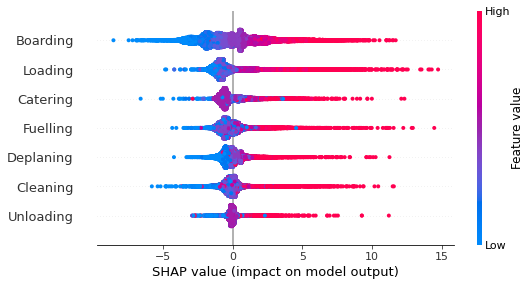

In [14]:
shap.summary_plot(shap_values, X_train) #class_names=model.classes_

In [15]:
0.

7.0765113580068535

In [16]:
math.sqrt(48.063823)

6.932807728474806

In [17]:
math.sqrt(46.061655)

6.78687372801351